## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
#Provided you are running IPython, the %matplotlib inline will make your plot outputs appear and be stored within the notebook.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
 

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [2]:
#to read data from csv file to NumPy array.
import csv
data_csv = []
with open("RegData.csv", 'rt') as read_csv:
  data = csv.reader(read_csv)
  for row in data:
    #print(row)
    data_csv.append(row)

Explore your data

In [3]:
print(data_csv)
print(type(data_csv)) # <class 'list'> 

np_data_csv = np.array(data_csv)
print(np_data_csv)
print(type(np_data_csv)) # <class 'numpy.ndarray'>

[['2.900000095', '4'], ['6.699999809', '7.400000095'], ['4.900000095', '5'], ['7.900000095', '7.199999809'], ['9.800000191', '7.900000095'], ['6.900000095', '6.099999905'], ['6.099999905', '6'], ['6.199999809', '5.800000191'], ['6', '5.199999809'], ['5.099999905', '4.199999809'], ['4.699999809', '4'], ['4.400000095', '4.400000095'], ['5.800000191', '5.199999809']]
<class 'list'>
[['2.900000095' '4']
 ['6.699999809' '7.400000095']
 ['4.900000095' '5']
 ['7.900000095' '7.199999809']
 ['9.800000191' '7.900000095']
 ['6.900000095' '6.099999905']
 ['6.099999905' '6']
 ['6.199999809' '5.800000191']
 ['6' '5.199999809']
 ['5.099999905' '4.199999809']
 ['4.699999809' '4']
 ['4.400000095' '4.400000095']
 ['5.800000191' '5.199999809']]
<class 'numpy.ndarray'>


Define variables X and y. Assign first column data to X and second column to y
Note: X is the independent variable (input to LR model) and y is the dependent variable (output)

In [4]:
X = np_data_csv[:,0]
Y_actual = np_data_csv[:,1]

# to convert from it string to float
X = X.astype(float)
Y_actual = Y_actual.astype(float)

#### Explore your data

In [5]:
print("features")
print(X)
print(type(X))
print(X.shape)
print("Actual output")
print(Y_actual)

features
[2.9000001  6.69999981 4.9000001  7.9000001  9.80000019 6.9000001
 6.0999999  6.19999981 6.         5.0999999  4.69999981 4.4000001
 5.80000019]
<class 'numpy.ndarray'>
(13,)
Actual output
[4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### Plot the original data (scatter plot of X,y)

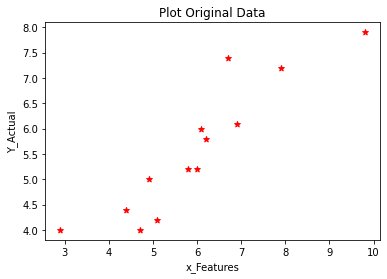

In [6]:
plt.scatter(X, Y_actual, marker= '*', c= 'red')
plt.xlabel('x_Features')
plt.ylabel('Y_Actual')
plt.title("Plot Original Data")
plt.show()

# Build Function for Making Gradient Descent

In [7]:
def Gradient(x, y, max_iteration,alpha, stop_critia ):
  theta0 = 0.0
  theta1 = 0.0
  theta0_list = []
  theta1_list = []
  loss_fun = []
  m = len(x) # Calculate the number of observations # number of rows
  count = 0
  for i in range(max_iteration):
    count+= 1
    # Step 1 # predict output
    y_predict = theta0 + theta1*x 
    # Step 2 # calculate cost function
    cost_old = (1/(2*m))* np.sum((y_predict - y)**2)
    
    # Step 3 # calculate gradient
    gradient_theta0 = (1/m)* np.sum((y_predict- y))
    gradient_theta1 = (1/m)* np.sum((y_predict-y )*x)
    # Calculate  update for Parameters
    theat0 = theta0 - (alpha*gradient_theta0)
    theta1 = theta1 - (alpha*gradient_theta0)
    
    # calculat
    g = np.linalg.norm([gradient_theta0,gradient_theta1],2)

    theta0_list.append(theta0)
    theta1_list.append(theta1)
    # calculate Y_predict and cost_function After update paramters
    y_predict = theta0 + theta1*x 
    cost_new = (1/(2*m))* np.sum((y_predict - y)**2)

    loss_fun.append(cost_new)

    if abs(cost_new - cost_old) < stop_critia:         #  stop critical cost function (stop when it doesn't decrease with iteration)
       print(f"Convergence occure at {count} iterations")
       return y_predict, theta0_list , theta1_list , loss_fun, g
    
    if g< 0.001:                                     # stop critical Gradient (check if the algorithm reached the minimum )
       return y_predict, theta0_list , theta1_list , loss_fun, g


  print(f"We Reach {max_iteration} iterations")
  return y_predict, theta0_list , theta1_list , loss_fun,g


In [8]:
ypredict, list0, list1, loss, g = Gradient( X, Y_actual, 1000, 0.01, 0.0001)
print(loss)
print(g)

Convergence occure at 64 iterations
[14.412895765076943, 12.741089416547016, 11.264348128392172, 9.960021444439073, 8.808082561332961, 7.7908248076789715, 6.892593213682439, 6.0995471157744925, 5.3994502093367895, 4.781484877119953, 4.23608798754049, 3.7548056812737842, 3.3301649513299516, 2.955560075433554, 2.6251521838558034, 2.3337804442548538, 2.076883520561146, 1.8504301181492633, 1.650857564808227, 1.4750174984307267, 1.3201278397211782, 1.183730323193711, 1.0636529437278461, 0.9579767502398596, 0.865006483733122, 0.7832446151029886, 0.7113683894685364, 0.6482095292604472, 0.5927362884980548, 0.5440375862459699, 0.5013089786886563, 0.4638402570747548, 0.4310044833817595, 0.40224829730736905, 0.3770833474349501, 0.355078716437696, 0.33585422523617364, 0.31907451433442463, 0.30444381233157725, 0.2917013120169109, 0.2806170836637338, 0.270988463280384, 0.2626368607781807, 0.2554049393850119, 0.24915412326573178, 0.24376239529170984, 0.23912235130704973, 0.2351394811347313, 0.2317306

## R2 Score

In [25]:
### to evaluate the performance (measure accuracy) of model use r2_score

from sklearn.metrics import r2_score
score = r2_score(Y_actual, ypredict)  # notes y_actual mustbe the first paramter
print(score)

0.7295178314277504


#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

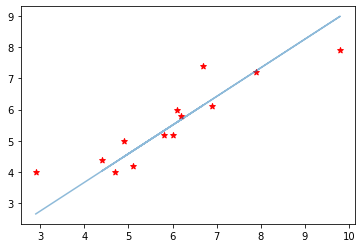

In [10]:

plt.scatter(X, Y_actual, marker= '*', c= 'red')  
plt.plot(X, ypredict, alpha=0.5)
plt.show()

GD vectorize Implementation

### Implement GD without iterate through data points i.e. use vector operations

In [11]:
alpha = 0.01
x=np.column_stack((np.ones(len(X),dtype=int), X))
print(x.shape)
print(x)
y= Y_actual.reshape(-1,1)
print(y.shape)
m=(x.shape)[0]
thetas=np.zeros((x.shape[1],1))
print(thetas.shape)
loss_function = []
for c in range(100):
        y_Predict= x@thetas
        
        cost_fun_old=(1/(2*m))* np.sum((y_Predict - y)**2)     
        
        Grad= (np.transpose(x)@(y_Predict-y))/m

        thetas= thetas - (alpha*Grad)
        ## update After Take Gradient
        y_Predict= x@thetas
        
        cost_fun_new= (1/(2*m))* np.sum((y_Predict - y)**2)
        loss_function.append(cost_fun_new)

print(loss_function)
    

(13, 2)
[[1.         2.9000001 ]
 [1.         6.69999981]
 [1.         4.9000001 ]
 [1.         7.9000001 ]
 [1.         9.80000019]
 [1.         6.9000001 ]
 [1.         6.0999999 ]
 [1.         6.19999981]
 [1.         6.        ]
 [1.         5.0999999 ]
 [1.         4.69999981]
 [1.         4.4000001 ]
 [1.         5.80000019]]
(13, 1)
(2, 1)
[6.175608808043305, 2.4178300654795644, 1.023798104945009, 0.5066182835290438, 0.3147143277319524, 0.24347430554386096, 0.21699567226372105, 0.2071217302429779, 0.2034075117887275, 0.20197836678314676, 0.20139696055681952, 0.2011301014330744, 0.20097999730449675, 0.20087327540003716, 0.20078271736477765, 0.20069822621899536, 0.20061605630353424, 0.2005348180360124, 0.20045399584099607, 0.2003733983635334, 0.20029295452116636, 0.20021263784768248, 0.20013243842778117, 0.20005235248600087, 0.19997237852463973, 0.19989251589108534, 0.19981276424635372, 0.19973312336793805, 0.19965359307667402, 0.1995741732096101, 0.19949486360994267, 0.1994156641

# Plot loss vs. iterations

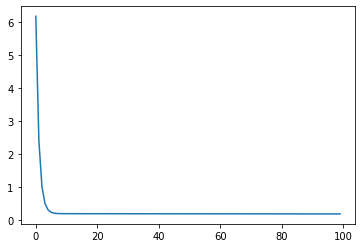

In [12]:
plt.plot(range(len(loss_function)), loss_function)
plt.show()

## R_2 score

In [13]:
from sklearn.metrics import r2_score
R2 = r2_score(y, y_Predict)
print(R2)

0.7563025293243409


## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source

In [14]:
mul_data = np.genfromtxt('MultipleLR.csv',delimiter=',')
print(type(mul_data))
print(mul_data)

<class 'numpy.ndarray'>
[[ 73.  80.  75. 152.]
 [ 93.  88.  93. 185.]
 [ 89.  91.  90. 180.]
 [ 96.  98. 100. 196.]
 [ 73.  66.  70. 142.]
 [ 53.  46.  55. 101.]
 [ 69.  74.  77. 149.]
 [ 47.  56.  60. 115.]
 [ 87.  79.  90. 175.]
 [ 79.  70.  88. 164.]
 [ 69.  70.  73. 141.]
 [ 70.  65.  74. 141.]
 [ 93.  95.  91. 184.]
 [ 79.  80.  73. 152.]
 [ 70.  73.  78. 148.]
 [ 93.  89.  96. 192.]
 [ 78.  75.  68. 147.]
 [ 81.  90.  93. 183.]
 [ 88.  92.  86. 177.]
 [ 78.  83.  77. 159.]
 [ 82.  86.  90. 177.]
 [ 86.  82.  89. 175.]
 [ 78.  83.  85. 175.]
 [ 76.  83.  71. 149.]
 [ 96.  93.  95. 192.]]


In [15]:
# seperate column of features and colum of predict
mul_x = mul_data[:, :3]
print(mul_x.shape)
print(mul_x)
mul_y_actual = mul_data[:,3]
print(mul_y_actual.shape)

(25, 3)
[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]
(25,)


In [16]:
# reshape of column of features and colum of predict
np.column_stack((np.ones(len(X),dtype=int), X))
mul_x = np.column_stack((np.ones(len(mul_data), dtype=int), mul_x)) # add column of x0
print(mul_x)
print(mul_x.shape)

[[  1.  73.  80.  75.]
 [  1.  93.  88.  93.]
 [  1.  89.  91.  90.]
 [  1.  96.  98. 100.]
 [  1.  73.  66.  70.]
 [  1.  53.  46.  55.]
 [  1.  69.  74.  77.]
 [  1.  47.  56.  60.]
 [  1.  87.  79.  90.]
 [  1.  79.  70.  88.]
 [  1.  69.  70.  73.]
 [  1.  70.  65.  74.]
 [  1.  93.  95.  91.]
 [  1.  79.  80.  73.]
 [  1.  70.  73.  78.]
 [  1.  93.  89.  96.]
 [  1.  78.  75.  68.]
 [  1.  81.  90.  93.]
 [  1.  88.  92.  86.]
 [  1.  78.  83.  77.]
 [  1.  82.  86.  90.]
 [  1.  86.  82.  89.]
 [  1.  78.  83.  85.]
 [  1.  76.  83.  71.]
 [  1.  96.  93.  95.]]
(25, 4)


In [17]:
mul_y_actual = mul_y_actual.reshape(-1,1)
print(mul_y_actual.shape)

(25, 1)


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [18]:
def Batch_GD(x,y,iterations,alpha,stop_critia):
    loss=[]
    
    m=(x.shape)[0]
    thetas=np.zeros((x.shape[1],1))
    count=0
    epoch=0
    
    while epoch < iterations :
        count+=1
        yPredict= x@thetas
        
        cost_fun_old= (1/(2*m))*(np.sum((yPredict-y)**2)) 
        
        Grad= (np.transpose(x)@(yPredict-y))/m
      
        thetas= thetas - (alpha*Grad)
      
        g = np.linalg.norm(Grad, 2)
        #print(g)
        yPredict= x@thetas

        cost_fun_new=(1/(2*m))*(np.sum((yPredict-y)**2)) 
        
        loss.append(cost_fun_new)
        
        if abs(cost_fun_new - cost_fun_old)<stop_critia:
            print(f"Convergence occure at {count} iterations")
            return r2_score(y,yPredict), thetas, yPredict,loss

        if g< 0.01:                                     # stop critical Gradient (check if the algorithm reached the minimum )
            return   r2_score(y,yPredict), thetas, yPredict,loss
        
        epoch+=1

    print(f"We Reach {iterations} iterations")
    return r2_score(y,yPredict), thetas, yPredict,loss

In [19]:
Score,Thetas,  mul_y_Predict ,loss=Batch_GD(mul_x,mul_y_actual,1000,0.0001,0.0001)
print(Score)

We Reach 1000 iterations
0.9886850607889688


### Plot loss vs. iterations

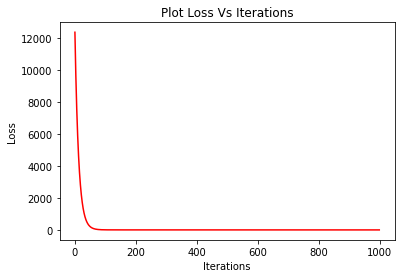

In [20]:
plt.plot(loss , c = 'red')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title("Plot Loss Vs Iterations")
plt.show()

#### Use R2 score to evaluate LR equation output

In [21]:
print(mul_y_Predict)
from sklearn.metrics import r2_score
R2 = r2_score(mul_y_actual,  mul_y_Predict)
print(R2)

[[152.87121322]
 [184.85674383]
 [181.47483649]
 [198.75052368]
 [140.34382743]
 [105.31205204]
 [150.10779197]
 [113.11610301]
 [174.37742357]
 [164.06972743]
 [143.81388672]
 [142.72273052]
 [186.36979543]
 [153.41203893]
 [151.08774876]
 [188.54161627]
 [145.10262039]
 [180.58785665]
 [177.3277855 ]
 [158.74612896]
 [175.79168644]
 [174.43302327]
 [167.19171348]
 [151.52786662]
 [190.88314212]]
0.9886850607889688


# Bonus
## LR Using sklearn

In [22]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score



#### Train the model (fit the model to the training data)


In [23]:
model = linear_model.LinearRegression()
print(X.shape)
X = X.reshape(-1,1)
print(X.shape)
print(Y_actual.shape)
model.fit(X, Y_actual)

Y_Predict = model.predict(X)
error  = mean_squared_error(Y_actual, Y_Predict)
score = r2_score(Y_actual, Y_Predict)
print(f"Error{error} , R2_score= {score}")
 

        # #Plot Sklearn Linear Regression Algorithm
        # plt.scatter(X,y , color = 'red')
        # plt.plot(X , model.predict(X) , color = 'k')
        # plt.xlabel('x')
        # plt.ylabel('y')
        # plt.title("Plot Sklearn Linear Regression Algorithm")
        # plt.show()

(13,)
(13, 1)
(13,)
Error0.284901060145438 , R2_score= 0.8213156778363777


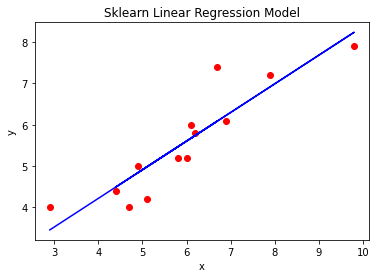

In [24]:
###Plot Sklearn Linear Regression Algorithm
plt.scatter(X, Y_actual, c="red")
plt.plot(X,  Y_Predict, c = 'blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Sklearn Linear Regression Model")
plt.show()